<a href="https://colab.research.google.com/github/Kateriiina/Lesson/blob/main/LAB3_%D0%BF%D0%BE%D0%BB%D0%BD%D1%8B%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
def plot_on_dataset(X, y, ax, name, hyperparams=None, activations=None):
    ax.set_title(name)
    X = MinMaxScaler().fit_transform(X)
    mlps = []
    if name == "breast_cancer":
        max_iter = 15
    else:
        max_iter = 400

    for label, param in zip(labels, params):
        if hyperparams:
            for hp_label, hp_value in hyperparams.items():
                param[hp_label] = hp_value
        print(f"Training model on dataset {name} with {label} method")
        mlp = MLPClassifier(random_state=0, max_iter=max_iter, **param)
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
            mlp.fit(X, y)
        mlps.append(mlp)
        print(f"Training set score: {mlp.score(X, y)}")
        print(f"Training set loss: {mlp.loss_}")
        if activations:
            for act_label, act_value in activations.items():
                print(f"Testing with activation function: {act_label}")
                mlp.activation = act_value
                y_pred = mlp.predict(X)
                accuracy = accuracy_score(y, y_pred)
                conf_matrix = confusion_matrix(y, y_pred)
                classification_rep = classification_report(y, y_pred)

                print(f'Test set accuracy: {accuracy}')
                print(f'Confusion Matrix:\n{conf_matrix}')
                print(f'Classification Report:\n{classification_rep}')

    for mlp, label, args in zip(mlps, labels, plot_args):
        ax.plot(mlp.loss_curve_, label=label, **args)


In [7]:
iris = datasets.load_iris()
X_cancer, y_cancer = datasets.load_breast_cancer(return_X_y=True)
params = [{'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': 0, 'learning_rate_init': 0.2},
          {'solver': 'adam', 'learning_rate_init': 0.01}]

labels = ["constant learning-rate", "inv-scaling learning-rate", "adam"]
plot_args = [{'c': 'red', 'linestyle': '-'}, {'c': 'green', 'linestyle': '--'}, {'c': 'blue', 'linestyle': '-'}]

Training model on dataset iris with constant learning-rate method
Training set score: 0.8266666666666667
Training set loss: 0.6694867620720153
Testing with activation function: logistic
Test set accuracy: 0.3333333333333333
Confusion Matrix:
[[ 0 50  0]
 [ 0 50  0]
 [ 0 50  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.33      1.00      0.50        50
           2       0.00      0.00      0.00        50

    accuracy                           0.33       150
   macro avg       0.11      0.33      0.17       150
weighted avg       0.11      0.33      0.17       150

Testing with activation function: tanh
Test set accuracy: 0.6933333333333334
Confusion Matrix:
[[50  0  0]
 [22  5 23]
 [ 0  1 49]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      1.00      0.82        50
           1       0.83      0.10      0.18        50

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training set score: 0.3333333333333333
Training set loss: 1.104850065176089
Testing with activation function: logistic
Test set accuracy: 0.3333333333333333
Confusion Matrix:
[[ 0 50  0]
 [ 0 50  0]
 [ 0 50  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.33      1.00      0.50        50
           2       0.00      0.00      0.00        50

    accuracy                           0.33       150
   macro avg       0.11      0.33      0.17       150
weighted avg       0.11      0.33      0.17       150

Testing with activation function: tanh
Test set accuracy: 0.02
Confusion Matrix:
[[ 3  0 47]
 [50  0  0]
 [50  0  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.03      0.06      0.04        50
           1       0.00      0.00      0.00        50
           2       0.00      0.00      0.00        50

    accuracy             

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Training set score: 0.9866666666666667
Training set loss: 0.04002558723054023
Testing with activation function: logistic
Test set accuracy: 0.5866666666666667
Confusion Matrix:
[[50  0  0]
 [12 38  0]
 [ 0 50  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89        50
           1       0.43      0.76      0.55        50
           2       0.00      0.00      0.00        50

    accuracy                           0.59       150
   macro avg       0.41      0.59      0.48       150
weighted avg       0.41      0.59      0.48       150

Testing with activation function: tanh
Test set accuracy: 0.92
Confusion Matrix:
[[50  0  0]
 [ 0 50  0]
 [ 0 12 38]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.81      1.00      0.89        50
           2       1.00      0.76      0.86        50

    accuracy           

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training set score: 0.4446397188049209
Training set loss: 0.6964173544196118
Testing with activation function: logistic
Test set accuracy: 0.37258347978910367
Confusion Matrix:
[[212   0]
 [357   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.37      1.00      0.54       212
           1       0.00      0.00      0.00       357

    accuracy                           0.37       569
   macro avg       0.19      0.50      0.27       569
weighted avg       0.14      0.37      0.20       569

Testing with activation function: tanh
Test set accuracy: 0.492091388400703
Confusion Matrix:
[[196  16]
 [273  84]]
Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.92      0.58       212
           1       0.84      0.24      0.37       357

    accuracy                           0.49       569
   macro avg       0.63      0.58      0.47       569
weighted avg       0.68      0.49     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training set score: 0.37082601054481545
Training set loss: 0.7556228280865965
Testing with activation function: logistic
Test set accuracy: 0.37258347978910367
Confusion Matrix:
[[212   0]
 [357   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.37      1.00      0.54       212
           1       0.00      0.00      0.00       357

    accuracy                           0.37       569
   macro avg       0.19      0.50      0.27       569
weighted avg       0.14      0.37      0.20       569

Testing with activation function: tanh
Test set accuracy: 0.37258347978910367
Confusion Matrix:
[[212   0]
 [357   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.37      1.00      0.54       212
           1       0.00      0.00      0.00       357

    accuracy                           0.37       569
   macro avg       0.19      0.50      0.27       569
weighted avg       0.14      0.37  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Training set score: 0.9806678383128296
Training set loss: 0.06915004872846055
Testing with activation function: logistic
Test set accuracy: 0.6274165202108963
Confusion Matrix:
[[  0 212]
 [  0 357]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       212
           1       0.63      1.00      0.77       357

    accuracy                           0.63       569
   macro avg       0.31      0.50      0.39       569
weighted avg       0.39      0.63      0.48       569

Testing with activation function: tanh
Test set accuracy: 0.961335676625659
Confusion Matrix:
[[208   4]
 [ 18 339]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       212
           1       0.99      0.95      0.97       357

    accuracy                           0.96       569
   macro avg       0.95      0.97      0.96       569
weighted avg       0.96      0.96     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


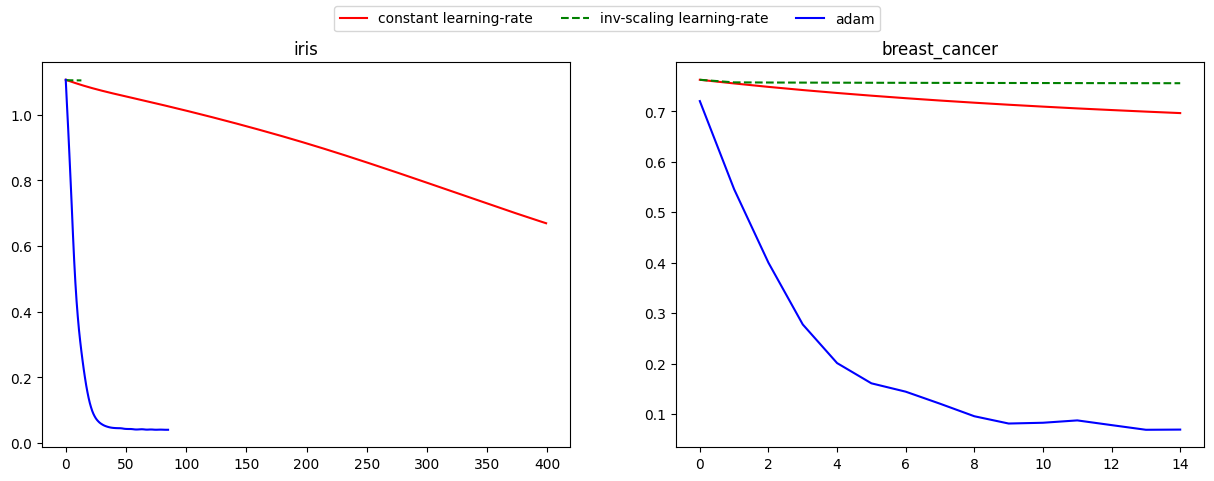

In [9]:
hyperparams_to_test = {'hidden_layer_sizes': (100, 50), 'learning_rate_init': 0.01}
activations_to_test = {'logistic': 'logistic', 'tanh': 'tanh', 'relu': 'relu'}

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
data_sets = [(iris.data, iris.target, hyperparams_to_test, activations_to_test),
             (X_cancer, y_cancer, hyperparams_to_test, activations_to_test)]

for ax, data, name in zip(axes.ravel(), data_sets, ['iris', 'breast_cancer']):
    plot_on_dataset(data[0], data[1], ax=ax, name=name, hyperparams=data[2], activations=data[3])

fig.legend(ax.get_lines(), labels, ncol=3, loc="upper center")
plt.show()